In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install wordcloud
%pip install nltk
%pip install scikit-learn
%pip install mlxtend
%pip install unidecode


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from unidecode import unidecode
from mlxtend.preprocessing import TransactionEncoder


In [2]:

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('AA_movie_train_data.csv')

In [4]:
df.head()

Title   Genre  \
0                               Windup (2006)   action   
1                               Hitman (2014)   action   
2                       Taken by Force (2010)   action   
3                      Bui doi Cho Lon (2013)   action   
4   Siam Yuth: The Dawn of the Kingdom (2015)   action   

                                         Description  
0   Windup is a very original comedy. We follow B...  
1   Rana and Shuvo, two siblings, are very differ...  
2   When a San Francisco detective goes hunting f...  
3   A man name Lam picks up his girlfriend, but i...  
4   Thap and Sin are a homeless musician brothers...

In [5]:
df['Genre'].value_counts()

Genre
action         1000
comedy         1000
documentary    1000
drama          1000
thriller       1000
Name: count, dtype: int64

In [6]:
df['Description'][0]

' Windup is a very original comedy. We follow Bernie Shaddick from his tragic childhood, through to his present day pursuit of a career as an inventor. Likened to such films as "Raising Arizona" and "The Big Lebowski", gritty cohen-esque humor saturates Bernie Shaddick\'s life, from his encounter with mace at a potential sale, to his murderous mentors posing as his Aunt Audre and Uncle Reg. Bernie is a man who, in the face of rejection and ridicule, just "doesn\'t get it", and perseveres anyways. His good nature gets on the nerves of his cruel co-workers at his commercial real estate day-job. Upholding an almost delusional enthusiasm, Bernie unknowingly sells his soul with a smile! Bernie\'s girlfriend Latrice and roommate Stuart only accentuate Bernie\'s seemingly pathetic existence. Latrice, sexy in a dirty sort of way, loves Bernie, although she would prefer to love his money, if he had any. Stuart, usually clad in underpants and obsessed with the rubix-cube, lives with Bernie becau

In [ ]:
def get_stop_words(stop_file_path):
    with open(stop_file_path, 'r', encoding='utf-8') as f:
        custom_stopwords = set(line.strip().lower() for line in f if line.strip())
    
    return frozenset(custom_stopwords)

In [ ]:
def clean_text(text):
    text = unidecode(text)                     
    text = text.lower()
    text = re.sub(r"</?.*?>", " ", text)
    text = re.sub(r"(\d|\W|_)+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [16]:
def tokenize_text(text):
    return word_tokenize(text)

In [17]:
def get_wordnet_pos(treebank_tag):
    """Convert TreeBank POS tags to WordNet POS tags"""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun


In [18]:
def lemmatize_with_pos(pos_tagged_tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    
    for word, tag in pos_tagged_tokens:
        pos = get_wordnet_pos(tag)  # You already have this function
        lemma = lemmatizer.lemmatize(word, pos)
        lemmas.append(lemma)

    return lemmas

In [19]:
stopwords = get_stop_words("stopwords.txt")

def full_text_pipeline(text, stopwords):
    cleaned = clean_text(text)
    tokens = tokenize_text(cleaned)
    pos_tags = pos_tag(tokens)
    lemmas = lemmatize_with_pos(pos_tags)
    filtered = [lemma for lemma in lemmas if lemma not in stopwords]
    return filtered, ' '.join(filtered)


df[['description_tokens', 'description_string']] = df['Description'].apply(
    lambda x: pd.Series(full_text_pipeline(x, stopwords))
)

description_tokens = df['description_tokens'].apply(len)
description_string = df['description_string']
df[['description_string']].to_csv('processed_descriptions.csv', index=False)

In [20]:
average_tokens = description_tokens.mean()
average_tokens

68.6558

In [21]:
description_string[0]

'windup original comedy follow bernie shaddick tragic childhood day pursuit career inventor liken film raise arizona lebowski gritty cohen esque humor saturate bernie shaddick life encounter mace potential sale murderous mentor pose aunt audre uncle reg bernie rejection ridicule doesn persevere anyways nature nerve cruel co worker commercial real estate day job uphold delusional enthusiasm bernie unknowingly sell soul smile bernie girlfriend latrice roommate stuart accentuate bernie seemingly pathetic existence latrice sexy dirty sort love bernie prefer love money stuart usually clothe underpants obsess rubix cube live bernie allow pursue beer welfare check latrice myriad flashback eccentric aunt uncle learn mentor reg audre life strange habit murder meal wheel delivery boys worry bernie won inherit twisted trait aunt audre uncle reg actually squatter murder pose real family bernie dream invent product windup flashlight conjure laughter succeed conscience boy bernie hold flashlight gra

In [22]:
description_string.shape

(5000,)

In [23]:
bow_vectorizer = CountVectorizer(max_df=0.16, max_features=5000)
description_bow_matrix = bow_vectorizer.fit_transform(description_string.tolist())

In [24]:
sum_words = description_bow_matrix.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in bow_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [25]:
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('woman', 1110),
 ('people', 962),
 ('kill', 945),
 ('try', 903),
 ('own', 900),
 ('father', 886),
 ('girl', 879),
 ('leave', 847),
 ('meet', 824),
 ('help', 798),
 ('home', 762),
 ('mother', 755),
 ('son', 742),
 ('wife', 741),
 ('begin', 713),
 ('start', 696),
 ('death', 673),
 ('brother', 670),
 ('police', 663),
 ('city', 659)]

In [26]:
print('The lowest frequency words:')
words_freq[-20:] 

The lowest frequency words:


[('singing', 10),
 ('mood', 10),
 ('paolo', 10),
 ('translate', 10),
 ('thinker', 10),
 ('rosario', 10),
 ('definition', 10),
 ('programme', 10),
 ('uber', 10),
 ('hiv', 10),
 ('kilometer', 10),
 ('manor', 10),
 ('astonish', 10),
 ('concentration', 10),
 ('mick', 10),
 ('haiti', 10),
 ('agatha', 10),
 ('hajira', 10),
 ('haru', 10),
 ('haunted', 10)]

In [27]:
bow_vectorizer.get_feature_names_out()

array(['aaron', 'aarti', 'abandon', ..., 'zombie', 'zone', 'zorawar'],
      dtype=object)

In [28]:
feature_names=np.array(bow_vectorizer.get_feature_names_out())
len(bow_vectorizer.get_feature_names_out())

5000

In [29]:
pd.DataFrame(description_bow_matrix.toarray())

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995     0     0     0     0     0     0     0     0     0     0  ...     0   
4996     0     0     0     0     0     0     0     0     0     0  ...     0   
4997     0     0     0     0     0     0     0     0     0     0  ...     0   
4998     0     0     0     0     0     0     0     0     0     0  ...     0   
4999     0     0     0     0     0     0     0     0     0     0  ...     0   

      4991  4992  4993  4994  4995  4996  4997  4998  4999  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4995     0     0     0     0     0     0     0     0     0  
4996     0     0     0     0     0     0     0     0     0  
4997     0     0     0     0     0     0     0     0     0  
4998     0     0     0     0     0     0     0     0     0  
4999     0     0     0     0     0     0     0     0     0  

[5000 rows x 5000 columns]

In [30]:
df_bow = pd.DataFrame(description_bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
df_bow.to_csv('asg1_bow_export.csv', index=False)

### 1.4 TF-IDF

In [31]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
description_tfidf = tfidf_transformer.fit_transform(description_bow_matrix)

In [32]:
tfidf_transformer.idf_

array([7.1194979 , 7.7256337 , 4.68111126, ..., 5.56614945, 6.29851735,
       8.82424599])

In [33]:
tfidf_transformer.idf_.shape

(5000,)

In [34]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['own' 'woman' 'try' 'people' 'meet' 'leave' 'help' 'kill' 'begin' 'start'
 'home' 'father' 'decide' 'lead' 'girl' 'follow' 'force' 'look' 'wife'
 'death' 'set' 'name' 'tell' 'son' 'bring' 'mother' 'city' 'run' 'soon'
 'fall' 'call' 'fight' 'child' 'daughter' 'police' 'return' 'change'
 'night' 'brother' 'discover' 'town' 'murder' 'lose' 'local' 'house'
 'past' 'documentary' 'secret' 'plan' 'learn' 'school' 'play' 'move'
 'dream' 'job' 'journey' 'save' 'series' 'money' 'struggle' 'happen'
 'relationship' 'movie' 'include' 'real' 'country' 'escape' 'war' 'hand'
 'head' 'win' 'die' 'character' 'event' 'american' 'attempt' 'realize'
 'break' 'sister' 'husband' 'boy' 'dead' 'student' 'stop' 'bad' 'power'
 'human' 'age' 'team' 'true' 'little' 'question' 'experience' 'former'
 'create' 'search' 'believe' 'evil' 'drug' 'beautiful']


In [35]:
pd.DataFrame(description_tfidf.toarray())

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      4991  4992  4993  4994  4995  4996  4997  4998  4999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5000 rows x 5000 columns]

In [36]:
# find maximum value for each of the features over dataset:
max_value = description_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['pound' 'necessity' 'endanger' 'obsessive' 'conceal' 'injure' 'kapoor'
 'primarily' 'operate' 'seriously' 'thirsty' 'flees' 'dc' 'actually'
 'resemble' 'enthusiasm' 'flip' 'verma' 'behalf' 'sand']
Features with highest tfidf: 
['flint' 'axel' 'tristan' 'jo' 'bernie' 'shanichari' 'kishan' 'coral'
 'yoga' 'jaswant' 'devin' 'perry' 'volcano' 'pierre' 'selma' 'sreeram'
 'rider' 'laundry' 'wine' 'comme']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [37]:
idx=0
doc = description_string[idx]
print(doc)

tf_idf_vector=description_tfidf[idx]
print(tf_idf_vector)

windup original comedy follow bernie shaddick tragic childhood day pursuit career inventor liken film raise arizona lebowski gritty cohen esque humor saturate bernie shaddick life encounter mace potential sale murderous mentor pose aunt audre uncle reg bernie rejection ridicule doesn persevere anyways nature nerve cruel co worker commercial real estate day job uphold delusional enthusiasm bernie unknowingly sell soul smile bernie girlfriend latrice roommate stuart accentuate bernie seemingly pathetic existence latrice sexy dirty sort love bernie prefer love money stuart usually clothe underpants obsess rubix cube live bernie allow pursue beer welfare check latrice myriad flashback eccentric aunt uncle learn mentor reg audre life strange habit murder meal wheel delivery boys worry bernie won inherit twisted trait aunt audre uncle reg actually squatter murder pose real family bernie dream invent product windup flashlight conjure laughter succeed conscience boy bernie hold flashlight gran

In [38]:
tf_idf_vector.shape

(1, 5000)

In [39]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp

feature_number    tf_idf
0               57  0.032775
1              143  0.033641
2              249  0.047578
3              321  0.173185
4              405  0.042541
..             ...       ...
94            4744  0.041647
95            4890  0.098492
96            4898  0.044452
97            4950  0.065667
98            4953  0.040316

[99 rows x 2 columns]

In [40]:
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

feature_number    tf_idf
5              434  0.854534
3              321  0.173185
92            4670  0.144621
73            3607  0.103817
87            4296  0.101269
..             ...       ...
51            2585  0.024966
19            1100  0.023841
36            1750  0.022149
38            1885  0.022111
90            4639  0.020200

[99 rows x 2 columns]

In [562]:
topn = 14
results =[]

In [563]:
for idx, doc in description_string.items():
    tf_idf_vector=description_tfidf[idx]
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data), columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result)

df['keywords'] = results

In [564]:
len(results)

5000

In [565]:
df['keywords'] = results
df.head()

Title   Genre  \
0                               Windup (2006)   action   
1                               Hitman (2014)   action   
2                       Taken by Force (2010)   action   
3                      Bui doi Cho Lon (2013)   action   
4   Siam Yuth: The Dawn of the Kingdom (2015)   action   

                                         Description  \
0   Windup is a very original comedy. We follow B...   
1   Rana and Shuvo, two siblings, are very differ...   
2   When a San Francisco detective goes hunting f...   
3   A man name Lam picks up his girlfriend, but i...   
4   Thap and Sin are a homeless musician brothers...   

                                  description_tokens  \
0  [windup, original, comedy, follow, bernie, sha...   
1  [rana, shuvo, sibling, father, police, constab...   
2  [san, francisco, detective, hunt, cruel, asian...   
3  [name, lam, pick, girlfriend, reveal, girlfrie...   
4  [thap, sin, homeless, musician, brother, villa...   

                                  description_string  \
0  windup original comedy follow bernie shaddick ...   
1  rana shuvo sibling father police constable dea...   
2  san francisco detective hunt cruel asian crime...   
3  name lam pick girlfriend reveal girlfriend act...   
4  thap sin homeless musician brother village rai...   

                                            keywords  keywords_sentiment  \
0  {'bernie': 0.855, 'aunt': 0.173, 'uncle': 0.14...                0.10   
1  {'rana': 0.677, 'brother': 0.224, 'crime': 0.1...                0.80   
2  {'nelson': 0.537, 'violent': 0.22, 'detective'...               -0.30   
3  {'lam': 0.744, 'gangster': 0.386, 'martial': 0...               -0.25   
4  {'ram': 0.699, 'sin': 0.416, 'prince': 0.309, ...                0.00   

   keywords_polarity  keywords_subjectivity  
0               0.10               0.150000  
1               0.80               1.000000  
2              -0.30               0.366667  
3              -0.25               0.500000  
4               0.00               0.000000

In [566]:
# Extract only the keyword keys from the dictionary (ignore TF-IDF values)
token_lists = df['keywords'].apply(lambda x: list(x.keys()))

# Convert to DataFrame, automatically expands lists into columns
transactions_df = pd.DataFrame(token_lists.tolist())

# Save to CSV without index or header
transactions_df.to_csv('transactions.csv', index=False, header=False)


### 2.2 Association Rules Mining on keywords

In [567]:
transactions = pd.read_csv("transactions.csv", header=None)
transactions.head()

0         1          2        3           4        5          6   \
0  bernie      aunt      uncle     real      stuart  welfare      cuban   
1    rana   brother      crime  bravery      extent   police     shower   
2  nelson   violent  detective    asian   francisco   device        san   
3     lam  gangster    martial   artist  girlfriend  brother       kill   
4     ram       sin     prince  kingdom     village     plan  residence   

          7       8         9           10     11          12        13  
0     invent  mentor   product  commercial   pose      estate        co  
1       tall  tackle   promote     villain  arise      assume   sibling  
2  terrorist  center   capture     partner  steal        gang       art  
3    furious   fight      trap      reveal   stab  protection    guilty  
4       stir    raid  villager        meet  frame    homeless  musician

In [568]:
transactions = [list(d.keys()) for d in results]
print(transactions)

[['bernie', 'aunt', 'uncle', 'real', 'stuart', 'welfare', 'cuban', 'invent', 'mentor', 'product', 'commercial', 'pose', 'estate', 'co'], ['rana', 'brother', 'crime', 'bravery', 'extent', 'police', 'shower', 'tall', 'tackle', 'promote', 'villain', 'arise', 'assume', 'sibling'], ['nelson', 'violent', 'detective', 'asian', 'francisco', 'device', 'san', 'terrorist', 'center', 'capture', 'partner', 'steal', 'gang', 'art'], ['lam', 'gangster', 'martial', 'artist', 'girlfriend', 'brother', 'kill', 'furious', 'fight', 'trap', 'reveal', 'stab', 'protection', 'guilty'], ['ram', 'sin', 'prince', 'kingdom', 'village', 'plan', 'residence', 'stir', 'raid', 'villager', 'meet', 'frame', 'homeless', 'musician'], ['ninja', 'diamond', 'smuggler', 'pose', 'assault', 'thug', 'trio', 'rap', 'dealer', 'wood', 'wait', 'beat', 'justice', 'hunt'], ['humanity', 'globe', 'terrorist', 'understand', 'enemy', 'attack', 'turkey', 'bring', 'psyche', 'terrorism', 'topic', 'upcoming', 'global', 'france'], ['rai', 'raghu

In [569]:
# Assuming df['keywords'] contains dictionaries
transactions = df['keywords'].apply(lambda x: list(x.keys())).tolist()

# Now transactions is a list of lists of strings
te = TransactionEncoder()
data_encoded = te.fit_transform(transactions)

# Convert to DataFrame
data_encoded_df = pd.DataFrame(data_encoded, columns=te.columns_)

# Check shape
print(data_encoded_df.shape)


(5000, 5000)


In [ ]:
# Step 1: Calculate total frequency of each keyword across all transactions
keyword_counts = data_encoded_df.sum().sort_values(ascending=False)

# Step 2: Select top 200 keywords
top_keywords = keyword_counts.head(100).index

# Step 3: Filter the encoded DataFrame to include only these columns
data_encoded_filtered = data_encoded_df[top_keywords]


In [596]:
print(data_encoded_filtered.sum(axis=1).mean())

1.2536


In [572]:
data_encoded_filtered.shape

(5000, 100)

In [573]:
data_encoded_filtered

girl  father  brother  mother    son  woman   kill  school  police  \
0     False   False    False   False  False  False  False   False   False   
1     False   False     True   False  False  False  False   False    True   
2     False   False    False   False  False  False  False   False   False   
3     False   False     True   False  False  False   True   False   False   
4     False   False    False   False  False  False  False   False   False   
...     ...     ...      ...     ...    ...    ...    ...     ...     ...   
4995  False   False    False    True  False  False  False   False   False   
4996  False   False    False   False  False  False  False   False   False   
4997  False   False    False   False  False  False  False   False   False   
4998  False   False    False   False  False  False  False   False   False   
4999  False   False    False   False  False  False  False   False   False   

      child  ...  criminal  follow  decide  inspector  change  ghost  officer  \
0     False  ...     False   False   False      False   False  False    False   
1     False  ...     False   False   False      False   False  False    False   
2     False  ...     False   False   False      False   False  False    False   
3     False  ...     False   False   False      False   False  False    False   
4     False  ...     False   False   False      False   False  False    False   
...     ...  ...       ...     ...     ...        ...     ...    ...      ...   
4995  False  ...     False   False    True      False   False  False    False   
4996  False  ...     False   False   False      False   False  False    False   
4997  False  ...     False   False   False      False   False  False    False   
4998  False  ...     False   False   False      False   False  False    False   
4999  False  ...     False   False   False      False   False  False    False   

      zombie  music  discover  
0      False  False     False  
1      False  False     False  
2      False  False     False  
3      False  False     False  
4      False  False     False  
...      ...    ...       ...  
4995   False  False     False  
4996   False  False     False  
4997   False  False     False  
4998   False  False     False  
4999   False  False     False  

[5000 rows x 100 columns]

In [574]:
for support in [0.05, 0.01, 0.005, 0.003, 0.002]:
    itemsets = apriori(data_encoded_filtered, min_support=support, use_colnames=True)
    print(f"Support: {support}, Itemsets: {itemsets.shape[0]}")

Support: 0.05, Itemsets: 0
Support: 0.01, Itemsets: 55
Support: 0.005, Itemsets: 100
Support: 0.003, Itemsets: 105
Support: 0.002, Itemsets: 120


In [575]:
frequent_itemsets=apriori(data_encoded_filtered, min_support = 0.002, use_colnames = True)

In [576]:
frequent_itemsets[['support']].describe()

support
count  120.000000
mean     0.010877
std      0.006073
min      0.002000
25%      0.007800
50%      0.009400
75%      0.013450
max      0.028200

In [577]:
frequent_itemsets

support             itemsets
0     0.0282               (girl)
1     0.0282             (father)
2     0.0262            (brother)
3     0.0250             (mother)
4     0.0248                (son)
..       ...                  ...
115   0.0028  (police, inspector)
116   0.0028    (police, officer)
117   0.0026     (wife, daughter)
118   0.0020      (wife, husband)
119   0.0022        (art, artist)

[120 rows x 2 columns]

In [578]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_l

antecedents  consequents  antecedent support  consequent support  support  \
0      (school)       (girl)              0.0228              0.0282   0.0022   
1        (girl)     (school)              0.0282              0.0228   0.0022   
2     (brother)     (father)              0.0262              0.0282   0.0024   
3      (father)    (brother)              0.0282              0.0262   0.0024   
4      (mother)     (father)              0.0250              0.0282   0.0032   
5      (father)     (mother)              0.0282              0.0250   0.0032   
6         (son)     (father)              0.0248              0.0282   0.0042   
7      (father)        (son)              0.0282              0.0248   0.0042   
8     (brother)       (kill)              0.0262              0.0232   0.0020   
9        (kill)    (brother)              0.0232              0.0262   0.0020   
10    (brother)     (police)              0.0262              0.0222   0.0022   
11     (police)    (brother)              0.0222              0.0262   0.0022   
12     (mother)        (son)              0.0250              0.0248   0.0030   
13        (son)     (mother)              0.0248              0.0250   0.0030   
14     (mother)   (daughter)              0.0250              0.0186   0.0020   
15   (daughter)     (mother)              0.0186              0.0250   0.0020   
16        (son)       (kill)              0.0248              0.0232   0.0024   
17       (kill)        (son)              0.0232              0.0248   0.0024   
18     (police)        (son)              0.0222              0.0248   0.0026   
19        (son)     (police)              0.0248              0.0222   0.0026   
20        (son)      (child)              0.0248              0.0214   0.0020   
21      (child)        (son)              0.0214              0.0248   0.0020   
22     (police)       (kill)              0.0222              0.0232   0.0032   
23       (kill)     (police)              0.0232              0.0222   0.0032   
24       (kill)     (killer)              0.0232              0.0134   0.0020   
25     (killer)       (kill)              0.0134              0.0232   0.0020   
26       (kill)  (inspector)              0.0232              0.0078   0.0024   
27  (inspector)       (kill)              0.0078              0.0232   0.0024   
28    (student)     (school)              0.0148              0.0228   0.0034   
29     (school)    (student)              0.0228              0.0148   0.0034   
30     (police)  (inspector)              0.0222              0.0078   0.0028   
31  (inspector)     (police)              0.0078              0.0222   0.0028   
32     (police)    (officer)              0.0222              0.0076   0.0028   
33    (officer)     (police)              0.0076              0.0222   0.0028   
34       (wife)   (daughter)              0.0202              0.0186   0.0026   
35   (daughter)       (wife)              0.0186              0.0202   0.0026   
36       (wife)    (husband)              0.0202              0.0146   0.0020   
37    (husband)       (wife)              0.0146              0.0202   0.0020   
38        (art)     (artist)              0.0136              0.0092   0.0022   
39     (artist)        (art)              0.0092              0.0136   0.0022   

    confidence       lift  representativity  leverage  conviction  \
0     0.096491   3.421675               1.0  0.001557    1.075584   
1     0.078014   3.421675               1.0  0.001557    1.059886   
2     0.091603   3.248335               1.0  0.001661    1.069797   
3     0.085106   3.248335               1.0  0.001661    1.064386   
4     0.128000   4.539007               1.0  0.002495    1.114450   
5     0.113475   4.539007               1.0  0.002495    1.099800   
6     0.169355   6.005491               1.0  0.003501    1.169934   
7     0.148936   6.005491               1.0  0.003501    1.145860   
8     0.076336   3.290340               1.0  0.001392    1.05

In [579]:
# Option B
rules_l[ (rules_l['lift'] >= 1.5) &
       (rules_l['confidence'] >= 0.1) ].sort_values(by='lift', ascending=False)

antecedents  consequents  antecedent support  consequent support  support  \
39     (artist)        (art)              0.0092              0.0136   0.0022   
38        (art)     (artist)              0.0136              0.0092   0.0022   
33    (officer)     (police)              0.0076              0.0222   0.0028   
32     (police)    (officer)              0.0222              0.0076   0.0028   
30     (police)  (inspector)              0.0222              0.0078   0.0028   
31  (inspector)     (police)              0.0078              0.0222   0.0028   
26       (kill)  (inspector)              0.0232              0.0078   0.0024   
27  (inspector)       (kill)              0.0078              0.0232   0.0024   
29     (school)    (student)              0.0228              0.0148   0.0034   
28    (student)     (school)              0.0148              0.0228   0.0034   
35   (daughter)       (wife)              0.0186              0.0202   0.0026   
34       (wife)   (daughter)              0.0202              0.0186   0.0026   
37    (husband)       (wife)              0.0146              0.0202   0.0020   
25     (killer)       (kill)              0.0134              0.0232   0.0020   
23       (kill)     (police)              0.0232              0.0222   0.0032   
22     (police)       (kill)              0.0222              0.0232   0.0032   
6         (son)     (father)              0.0248              0.0282   0.0042   
7      (father)        (son)              0.0282              0.0248   0.0042   
13        (son)     (mother)              0.0248              0.0250   0.0030   
12     (mother)        (son)              0.0250              0.0248   0.0030   
19        (son)     (police)              0.0248              0.0222   0.0026   
18     (police)        (son)              0.0222              0.0248   0.0026   
4      (mother)     (father)              0.0250              0.0282   0.0032   
5      (father)     (mother)              0.0282              0.0250   0.0032   
15   (daughter)     (mother)              0.0186              0.0250   0.0020   
17       (kill)        (son)              0.0232              0.0248   0.0024   

    confidence       lift  representativity  leverage  conviction  \
39    0.239130  17.583120               1.0  0.002075    1.296411   
38    0.161765  17.583120               1.0  0.002075    1.182007   
33    0.368421  16.595543               1.0  0.002631    1.548183   
32    0.126126  16.595543               1.0  0.002631    1.135633   
30    0.126126  16.170016               1.0  0.002627    1.135404   
31    0.358974  16.170016               1.0  0.002627    1.525368   
26    0.103448  13.262599               1.0  0.002219    1.106685   
27    0.307692  13.262599               1.0  0.002219    1.410933   
29    0.149123  10.075865               1.0  0.003063    1.157864   
28    0.229730  10.075865               1.0  0.003063    1.268646   
35    0.139785   6.920047               1.0  0.002224    1.139018   
34    0.128713   6.920047               1.0  0.002224    1.126380   
37    0.136986   6.781500               1.0  0.001705    1.135324   
25    0.149254   6.433350               1.0  0.001689    1.148168   
23    0.137931   6.213110               1.0  0.002685    1.134248   
22    0.144144   6.213110               1.0  0.002685    1.141314   
6     0.169355   6.005491               1.0  0.003501    1.169934   
7     0.148936   6.005491               1.0  0.003501    1.145860   
13    0.120968   4.838710               1.0  0.002380    1.109174   
12    0.120000   4.838710               1.0  0.002380    1.108182   
19    0.104839   4.722464               1.0  0.002049    1.092317   
18    0.117117   4.722464               1.0  0.002049    1.104563   
4     0.128000   4.539007               1.0  0.002495    1.114450   
5     0.113475   4.539007               1.0  0.002495    1.099800   
15    0.107527   4.301075               1.0  0.001535    1.092470   
17    0.103448   4.171

In [580]:
rules_filtered = rules_l[(rules_l['lift'] > 3) & (rules_l['confidence'] > 0.1)]
rules_filtered.sort_values(by='lift', ascending=False)

antecedents  consequents  antecedent support  consequent support  support  \
39     (artist)        (art)              0.0092              0.0136   0.0022   
38        (art)     (artist)              0.0136              0.0092   0.0022   
33    (officer)     (police)              0.0076              0.0222   0.0028   
32     (police)    (officer)              0.0222              0.0076   0.0028   
30     (police)  (inspector)              0.0222              0.0078   0.0028   
31  (inspector)     (police)              0.0078              0.0222   0.0028   
26       (kill)  (inspector)              0.0232              0.0078   0.0024   
27  (inspector)       (kill)              0.0078              0.0232   0.0024   
29     (school)    (student)              0.0228              0.0148   0.0034   
28    (student)     (school)              0.0148              0.0228   0.0034   
35   (daughter)       (wife)              0.0186              0.0202   0.0026   
34       (wife)   (daughter)              0.0202              0.0186   0.0026   
37    (husband)       (wife)              0.0146              0.0202   0.0020   
25     (killer)       (kill)              0.0134              0.0232   0.0020   
23       (kill)     (police)              0.0232              0.0222   0.0032   
22     (police)       (kill)              0.0222              0.0232   0.0032   
6         (son)     (father)              0.0248              0.0282   0.0042   
7      (father)        (son)              0.0282              0.0248   0.0042   
13        (son)     (mother)              0.0248              0.0250   0.0030   
12     (mother)        (son)              0.0250              0.0248   0.0030   
19        (son)     (police)              0.0248              0.0222   0.0026   
18     (police)        (son)              0.0222              0.0248   0.0026   
4      (mother)     (father)              0.0250              0.0282   0.0032   
5      (father)     (mother)              0.0282              0.0250   0.0032   
15   (daughter)     (mother)              0.0186              0.0250   0.0020   
17       (kill)        (son)              0.0232              0.0248   0.0024   

    confidence       lift  representativity  leverage  conviction  \
39    0.239130  17.583120               1.0  0.002075    1.296411   
38    0.161765  17.583120               1.0  0.002075    1.182007   
33    0.368421  16.595543               1.0  0.002631    1.548183   
32    0.126126  16.595543               1.0  0.002631    1.135633   
30    0.126126  16.170016               1.0  0.002627    1.135404   
31    0.358974  16.170016               1.0  0.002627    1.525368   
26    0.103448  13.262599               1.0  0.002219    1.106685   
27    0.307692  13.262599               1.0  0.002219    1.410933   
29    0.149123  10.075865               1.0  0.003063    1.157864   
28    0.229730  10.075865               1.0  0.003063    1.268646   
35    0.139785   6.920047               1.0  0.002224    1.139018   
34    0.128713   6.920047               1.0  0.002224    1.126380   
37    0.136986   6.781500               1.0  0.001705    1.135324   
25    0.149254   6.433350               1.0  0.001689    1.148168   
23    0.137931   6.213110               1.0  0.002685    1.134248   
22    0.144144   6.213110               1.0  0.002685    1.141314   
6     0.169355   6.005491               1.0  0.003501    1.169934   
7     0.148936   6.005491               1.0  0.003501    1.145860   
13    0.120968   4.838710               1.0  0.002380    1.109174   
12    0.120000   4.838710               1.0  0.002380    1.108182   
19    0.104839   4.722464               1.0  0.002049    1.092317   
18    0.117117   4.722464               1.0  0.002049    1.104563   
4     0.128000   4.539007               1.0  0.002495    1.114450   
5     0.113475   4.539007               1.0  0.002495    1.099800   
15    0.107527   4.301075               1.0  0.001535    1.092470   
17    0.103448   4.171

In [581]:
rules_l[['lift']].boxplot()

<Axes: >

In [582]:
df

Title     Genre  \
0                                     Windup (2006)     action   
1                                     Hitman (2014)     action   
2                             Taken by Force (2010)     action   
3                            Bui doi Cho Lon (2013)     action   
4         Siam Yuth: The Dawn of the Kingdom (2015)     action   
...                                              ...       ...   
4995                          The Harvesters (2000)   thriller   
4996                                    PRND (2017)   thriller   
4997   Jimmy Tupper vs. the Goatman of Bowie (2010)   thriller   
4998                 Captive of a Death Mask (2012)   thriller   
4999                               Locker 13 (2014)   thriller   

                                            Description  \
0      Windup is a very original comedy. We follow B...   
1      Rana and Shuvo, two siblings, are very differ...   
2      When a San Francisco detective goes hunting f...   
3      A man name Lam picks up his girlfriend, but i...   
4      Thap and Sin are a homeless musician brothers...   
...                                                 ...   
4995   Danielle Carver has inherited the same heart ...   
4996   When Max has a disturbing incident with a dri...   
4997   Jimmy Tupper is a no one, he's nothing. He sp...   
4998   The only one more scared than his victims is ...   
4999   Skip, the nighttime janitor in an Old West th...   

                                     description_tokens  \
0     [windup, original, comedy, follow, bernie, sha...   
1     [rana, shuvo, sibling, father, police, constab...   
2     [san, francisco, detective, hunt, cruel, asian...   
3     [name, lam, pick, girlfriend, reveal, girlfrie...   
4     [thap, sin, homeless, musician, brother, villa...   
...                                                 ...   
4995  [danielle, carver, inherit, heart, disease, mo...   
4996  [max, disturbing, incident, driver, transporta...   
4997  [jimmy, tupper, spend, day, starbucks, suburba...   
4998  [scar, victim, killer, underground, fighter, s...   
4999  [skip, nighttime, janitor, west, theme, park, ...   

                                     description_string  \
0     windup original comedy follow bernie shaddick ...   
1     rana shuvo sibling father police constable dea...   
2     san francisco detective hunt cruel asian crime...   
3     name lam pick girlfriend reveal girlfriend act...   
4     thap sin homeless musician brother village rai...   
...                                                 ...   
4995  danielle carver inherit heart disease mother d...   
4996  max disturbing incident driver transportation ...   
4997  jimmy tupper spend day starbucks suburban mary...   
4998  scar victim killer underground fighter sean po...   
4999  skip nighttime janitor west theme park delve m...   

                                               keywords  keywords_sentiment  \
0     {'bernie': 0.855, 'aunt': 0.173, 'uncle': 0.14...              0.1000   
1     {'rana': 0.677, 'brother': 0.224, 'crime': 0.1...              0.8000   
2     {'nelson': 0.537, 'violent': 0.22, 'detective'...             -0.3000   
3     {'lam': 0.744, 'gangster': 0.386, 'martial': 0...             -0.2500   
4     {'ram': 0.699, 'sin': 0.416, 'prince': 0.309, ...              0.0000   
...                                                 ...                 ...   
4995  {'danielle': 0.525, 'rachel': 0.454, 'jeff': 0...             -0.0500   
4996  {'max': 0.594, 'driver': 0.364, 'car': 0.204, ...             -0.2500   
4997  {'jimmy': 0.689, 'wood': 0.305, 'monster': 0.2...             -0.3750   
4998  {'sean': 0.514, 'victim': 0.227, 'killer': 0.2...              0.0625   
4999  {'skip': 0.362, 'sage': 0.199, 'play': 0.19, '...              0.0000   

      keywords_polarity  keywords_subjectivity  
0                0.1000               0.150000  
1                0.8000               1.000000  
2               -0.3000        

# OTHER METHODS

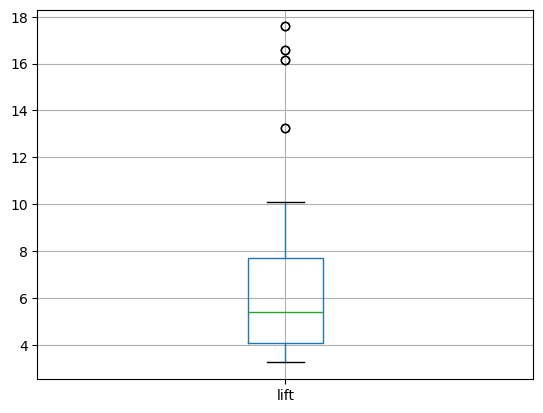

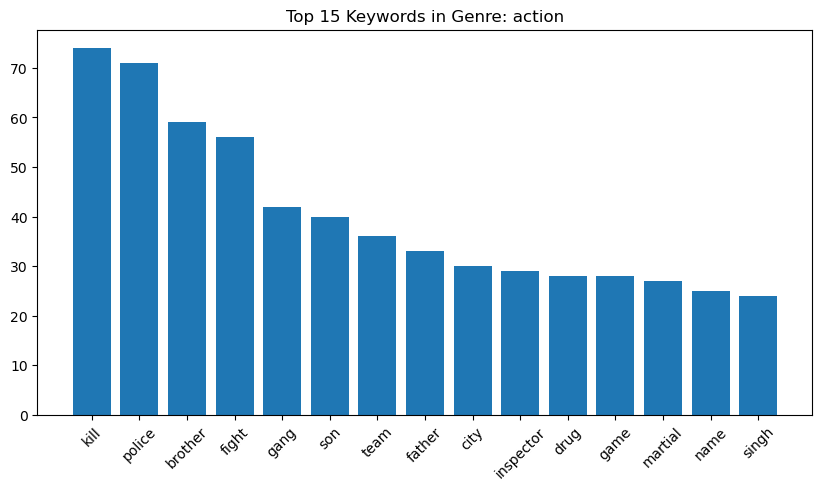

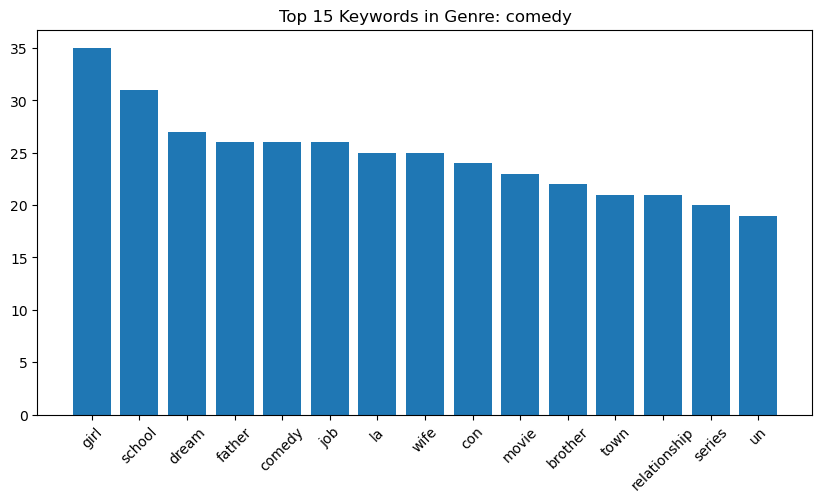

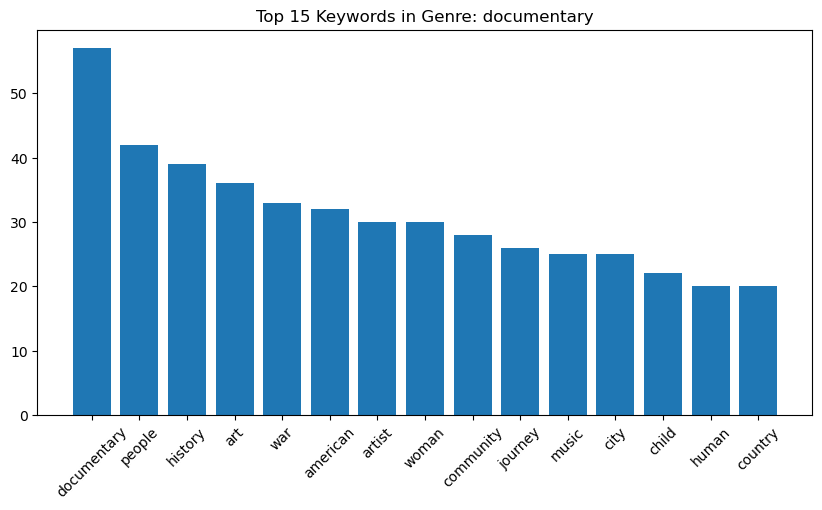

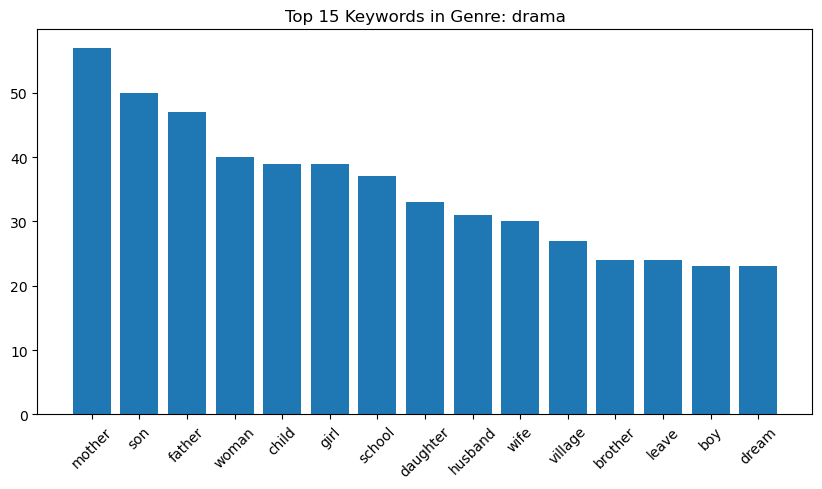

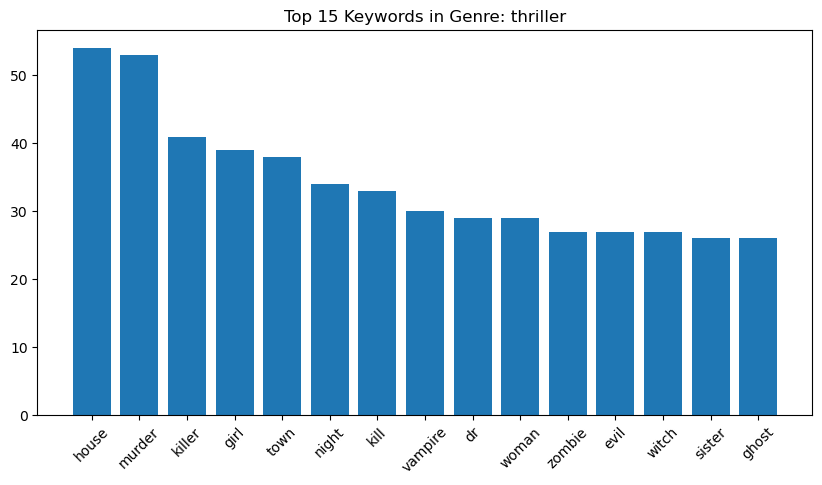

In [583]:
import matplotlib.pyplot as plt
from collections import Counter

# Assume df['keywords'] contains dict of {word: tfidf_score} for each movie
genres = df['Genre'].unique()

for genre in genres:
    # Get all keywords for movies in this genre
    genre_keywords = df[df['Genre'] == genre]['keywords'].tolist()
    
    # Flatten all keywords into a list (ignore tfidf, just use keys)
    all_words = [word for d in genre_keywords for word in d.keys()]
    
    # Count frequency of keywords
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(15)
    
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(f"Top 15 Keywords in Genre: {genre}")
    plt.xticks(rotation=45)
    plt.show()


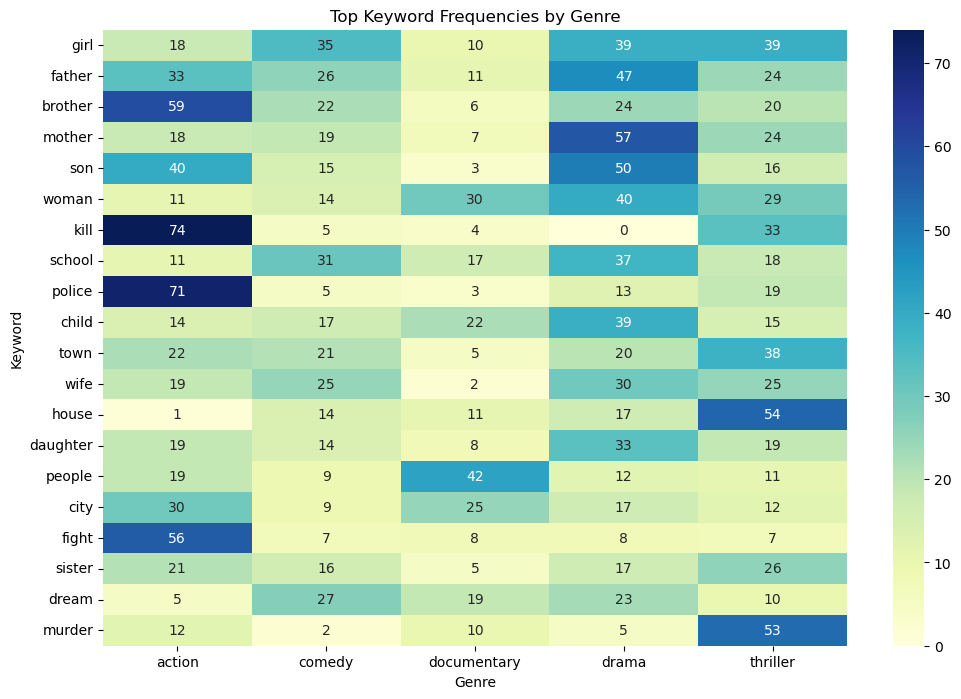

In [600]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten all keywords with their genres
genre_keyword_counts = {}

for genre in df['Genre'].unique():
    keyword_dicts = df[df['Genre'] == genre]['keywords'].tolist()
    all_keywords = []
    for kw_dict in keyword_dicts:
        all_keywords.extend(kw_dict.keys())
    genre_keyword_counts[genre] = pd.Series(all_keywords).value_counts()

# Create DataFrame from dict of Series
genre_keyword_df = pd.DataFrame(genre_keyword_counts).fillna(0)

# Select top 20 keywords overall to keep heatmap readable
top_keywords = genre_keyword_df.sum(axis=1).sort_values(ascending=False).head(20).index
top_keywords_df = genre_keyword_df.loc[top_keywords]

plt.figure(figsize=(12,8))
sns.heatmap(top_keywords_df, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top Keyword Frequencies by Genre')
plt.xlabel('Genre')
plt.ylabel('Keyword')
plt.show()


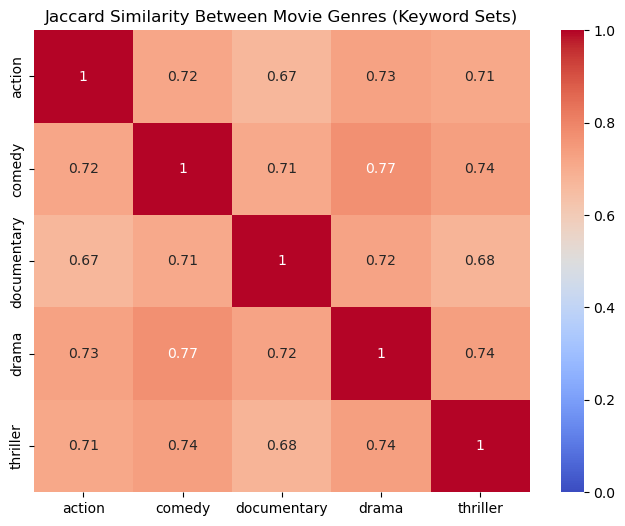

In [601]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

genres = df['Genre'].unique()
genre_keywords_sets = {}

# Create a set of unique keywords per genre
for genre in genres:
    all_words = [word for d in df[df['Genre'] == genre]['keywords'].tolist() for word in d.keys()]
    genre_keywords_sets[genre] = set(all_words)

# Build similarity matrix
sim_matrix = np.zeros((len(genres), len(genres)))

for i, g1 in enumerate(genres):
    for j, g2 in enumerate(genres):
        sim_matrix[i, j] = jaccard_similarity(genre_keywords_sets[g1], genre_keywords_sets[g2])

# Convert to DataFrame for better plotting
sim_df = pd.DataFrame(sim_matrix, index=genres, columns=genres)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sim_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Jaccard Similarity Between Movie Genres (Keyword Sets)')
plt.show()


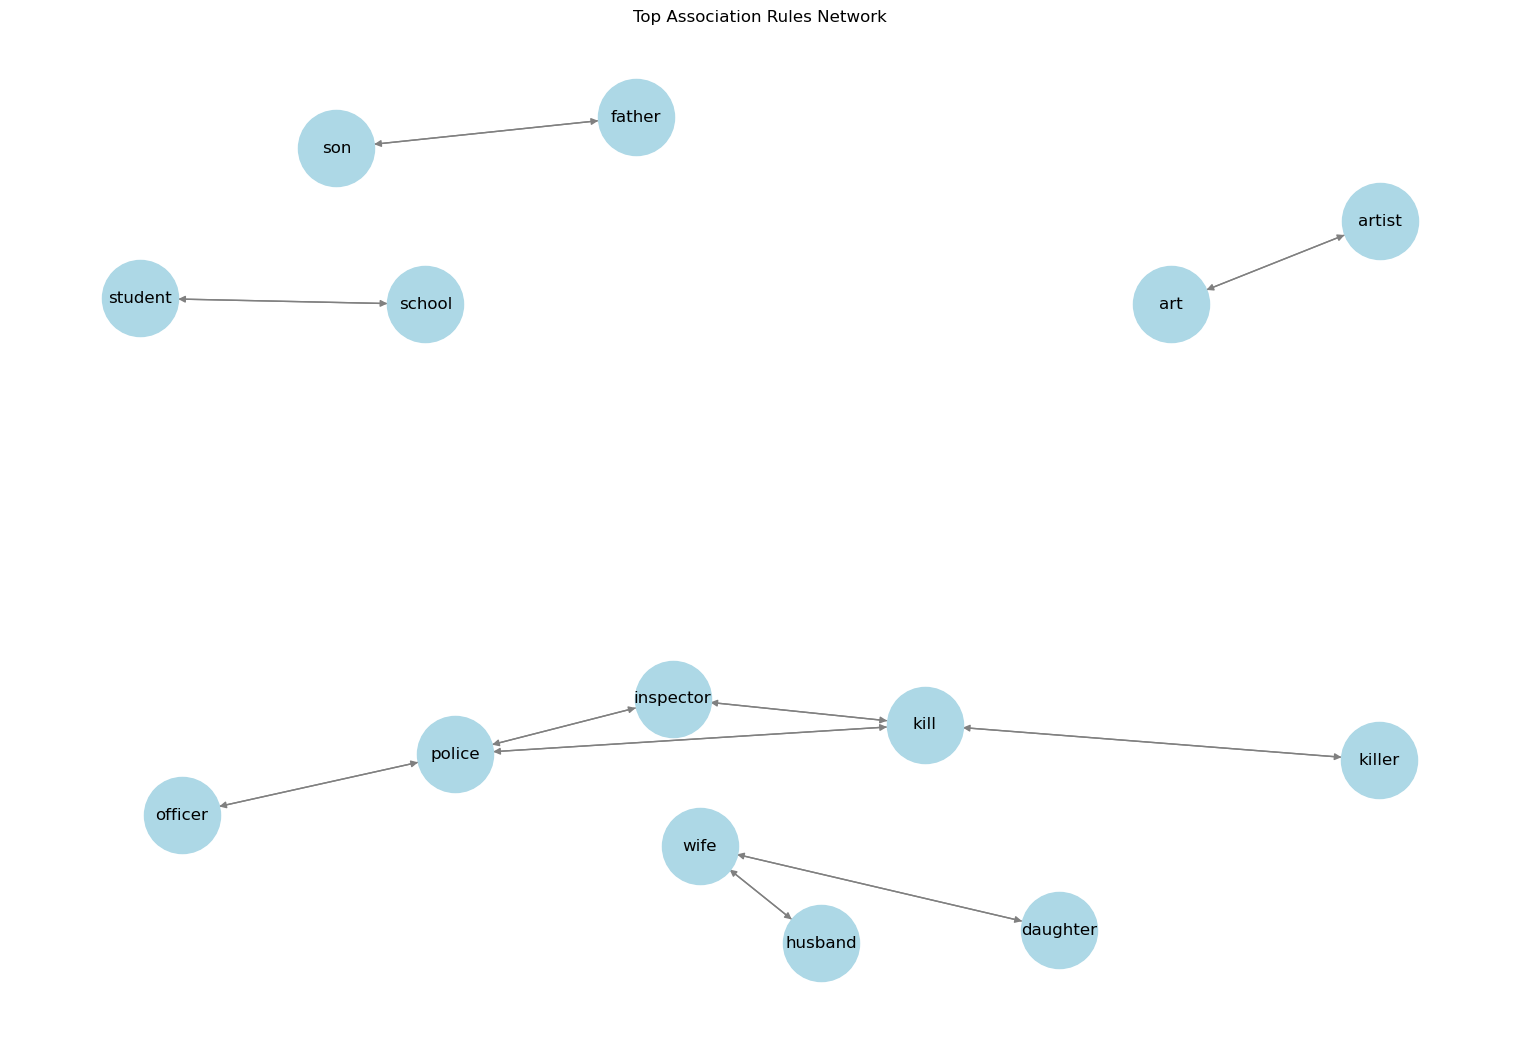

In [590]:
import networkx as nx

# Example: Use top 20 ARM rules (you can filter by lift or confidence)
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3.0)
rules = rules.sort_values('lift', ascending=False).head(20)

G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', 
        edge_color='gray', font_size=12, arrows=True)
plt.title('Top Association Rules Network')
plt.show()


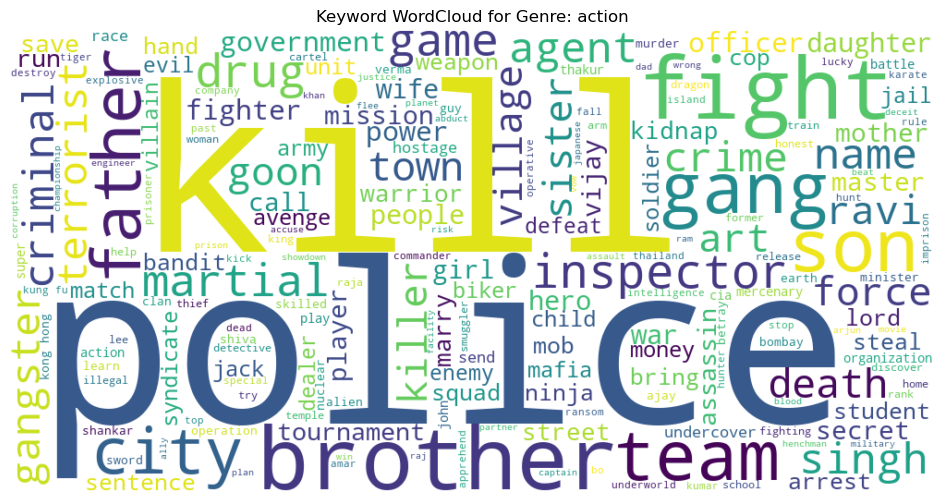

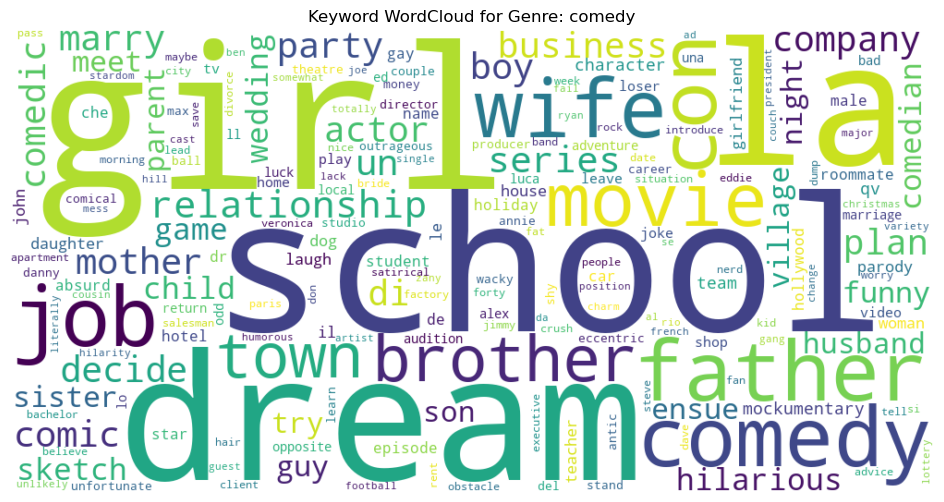

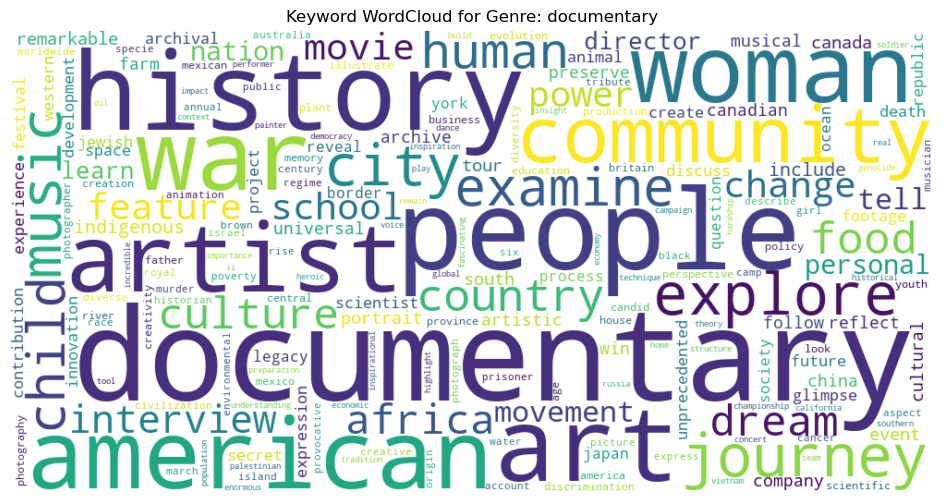

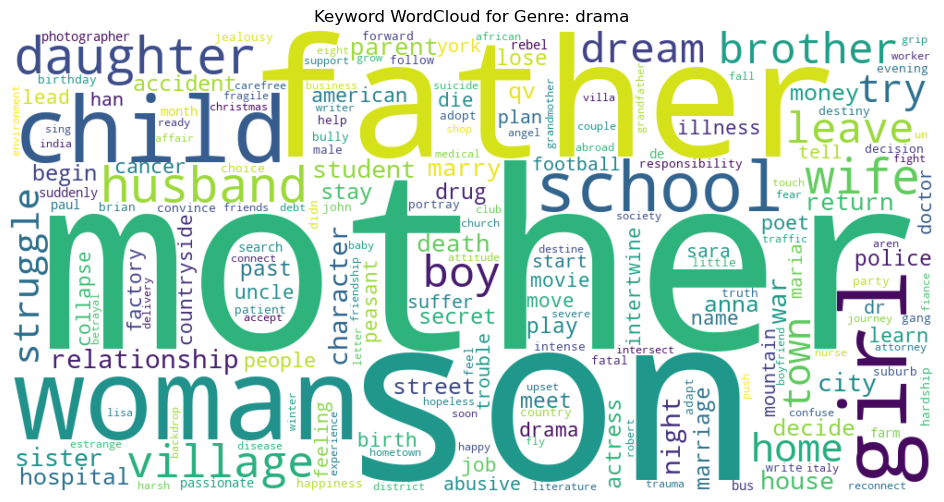

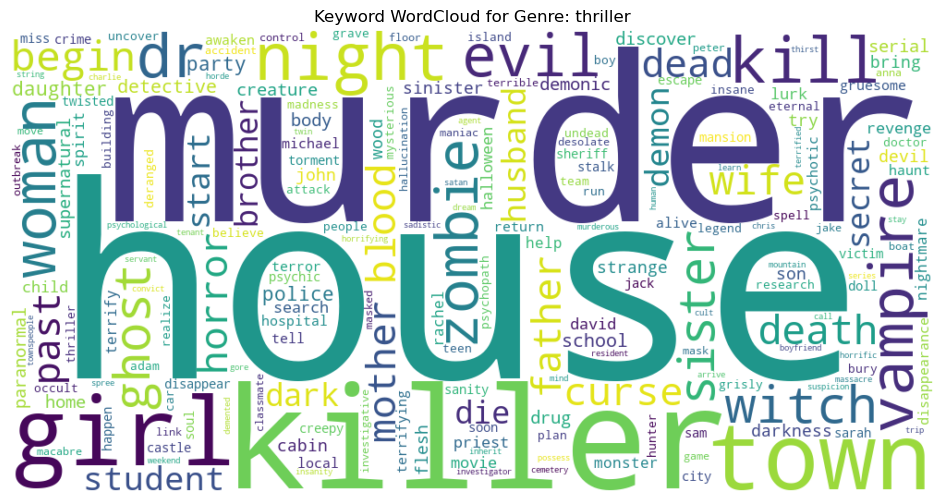

In [592]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres = df['Genre'].unique()

for genre in genres:
    # Extract keywords dictionaries for the genre and flatten keys to a list
    keyword_lists = df[df['Genre'] == genre]['keywords'].tolist()
    
    # Flatten list of dict keys into one list of keywords
    keywords = []
    for kw_dict in keyword_lists:
        keywords.extend(kw_dict.keys())
    
    # Join all keywords into one big string
    text = ' '.join(keywords)
    
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Keyword WordCloud for Genre: {genre}')
    plt.show()


# DONT LOOK BELOW

# BOW MODELLING

In [593]:
X = description_bow_matrix
y = df["Genre"].values

In [594]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


c:\Users\Admin\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\Admin\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\Admin\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\Admin\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'train_test_split' is not defined

# BEFORE TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("🔵 Logistic Regression Report")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))
f1_log = f1_score(y_test, y_pred_log, average='weighted')
print(f"🎯 Weighted F1 Score: {f1_log:.4f}")

🔵 Logistic Regression Report
              precision    recall  f1-score   support

      action       0.73      0.70      0.71       316
      comedy       0.59      0.59      0.59       309
 documentary       0.73      0.80      0.76       284
       drama       0.55      0.56      0.56       301
    thriller       0.73      0.69      0.71       290

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.66      1500

🎯 Weighted F1 Score: 0.6650


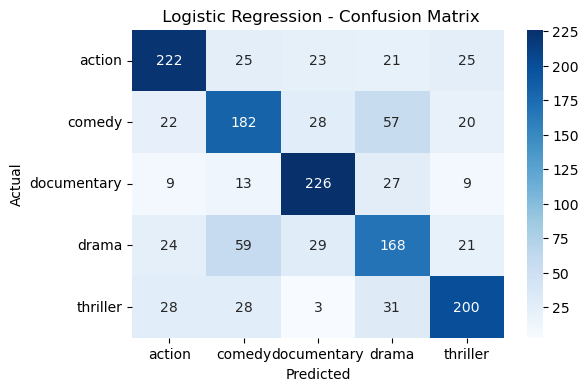

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(" Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🟢 Random Forest Report")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"🎯 Weighted F1 Score: {f1_rf:.4f}")


🟢 Random Forest Report
              precision    recall  f1-score   support

      action       0.63      0.67      0.65       316
      comedy       0.67      0.48      0.56       309
 documentary       0.70      0.85      0.77       284
       drama       0.52      0.58      0.55       301
    thriller       0.67      0.60      0.64       290

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.63      1500
weighted avg       0.64      0.64      0.63      1500

🎯 Weighted F1 Score: 0.6313


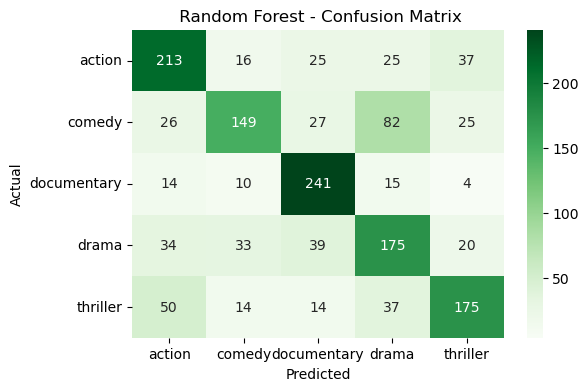

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(" Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("🟡 Naive Bayes Report")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print(f"🎯 Weighted F1 Score: {f1_nb:.4f}")

🟡 Naive Bayes Report
              precision    recall  f1-score   support

      action       0.75      0.69      0.72       316
      comedy       0.66      0.59      0.63       309
 documentary       0.71      0.86      0.78       284
       drama       0.54      0.54      0.54       301
    thriller       0.74      0.73      0.73       290

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500

🎯 Weighted F1 Score: 0.6779


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


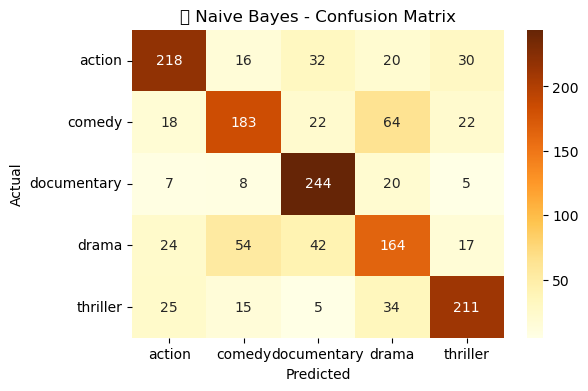

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="YlOrBr", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("🟡 Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AFTER TRAINING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Feature selection
selector = SelectKBest(chi2, k=3900)  # you can change k=2000/4000 as needed
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Plotting function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, cmap, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

🔵 Logistic Regression
              precision    recall  f1-score   support

      action       0.74      0.72      0.73       300
      comedy       0.65      0.68      0.67       300
 documentary       0.80      0.80      0.80       300
       drama       0.59      0.58      0.59       300
    thriller       0.71      0.70      0.71       300

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500

🎯 Weighted F1 Score: 0.6994


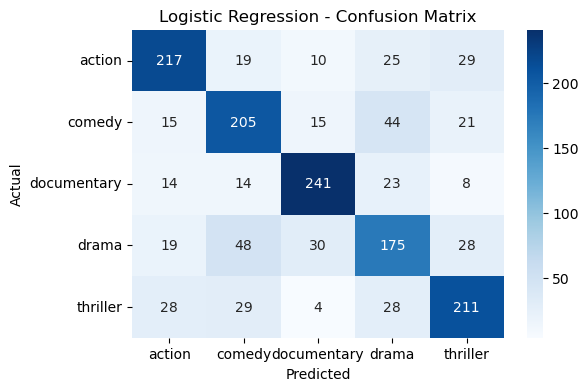

In [ ]:
print("🔵 Logistic Regression")

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, scoring='f1_weighted', cv=5)
grid_lr.fit(X_train_sel, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_sel)

print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix", "Blues", label_encoder.classes_)

🟢 Random Forest
              precision    recall  f1-score   support

      action       0.65      0.68      0.66       300
      comedy       0.65      0.50      0.57       300
 documentary       0.72      0.78      0.75       300
       drama       0.53      0.56      0.55       300
    thriller       0.67      0.71      0.69       300

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.64      1500
weighted avg       0.65      0.65      0.64      1500

🎯 Weighted F1 Score: 0.6429


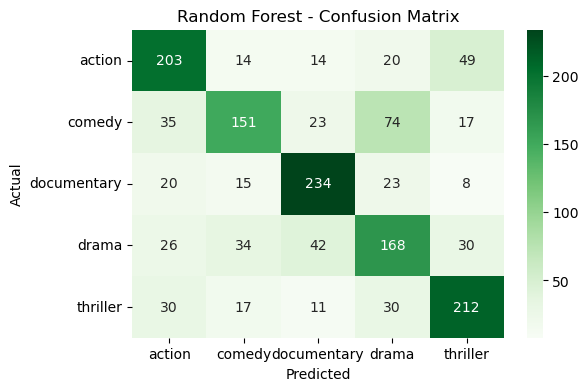

In [ ]:
# --- RANDOM FOREST ---

print("🟢 Random Forest")

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='f1_weighted', cv=5)
grid_rf.fit(X_train_sel, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)

print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix", "Greens", label_encoder.classes_)


🟡 Naive Bayes
              precision    recall  f1-score   support

      action       0.73      0.68      0.70       300
      comedy       0.67      0.64      0.66       300
 documentary       0.73      0.82      0.77       300
       drama       0.58      0.58      0.58       300
    thriller       0.72      0.72      0.72       300

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500

🎯 Weighted F1 Score: 0.6868


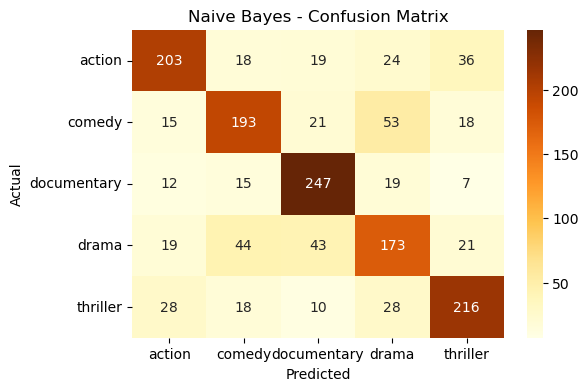

In [ ]:
# --- NAIVE BAYES ---

print("🟡 Naive Bayes")

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, scoring='f1_weighted', cv=5)
grid_nb.fit(X_train_sel, y_train)
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_sel)

print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes - Confusion Matrix", "YlOrBr", label_encoder.classes_)


In [ ]:
print("\n📊 Model F1 Score Comparison")
print(f"Logistic Regression: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Random Forest     : {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Naive Bayes       : {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")



📊 Model F1 Score Comparison
Logistic Regression: 0.6994
Random Forest     : 0.6429
Naive Bayes       : 0.6868


# TFIDF MODELLING

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.16, max_features=5000)
tfidf_X = vectorizer.fit_transform(description_string)
tfidf_X_vectorized = tfidf_X.toarray()

In [ ]:
print(tfidf_X_vectorized.max())

1.0


In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_X_vectorized, y_encoded, test_size=0.3, random_state=42)

def plot_confusion_matrix(y_true, y_pred, title, cmap, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


🔵 Logistic Regression
              precision    recall  f1-score   support

      action       0.74      0.76      0.75       409
      comedy       0.67      0.65      0.66       418
 documentary       0.76      0.81      0.78       402
       drama       0.57      0.56      0.57       388
    thriller       0.74      0.71      0.72       383

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000

🎯 Weighted F1 Score: 0.6976


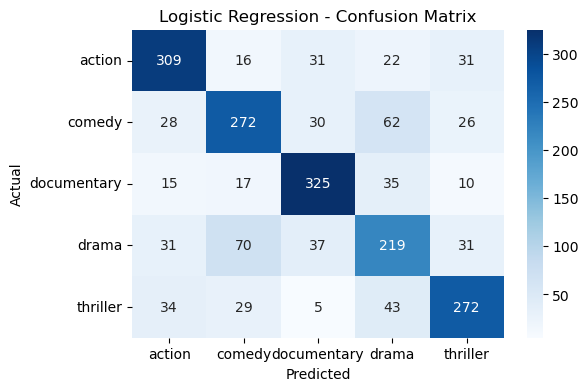

In [ ]:
print("🔵 Logistic Regression")

model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train_tfidf, y_train)
y_pred_lr = model_lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix", "Blues", label_encoder.classes_)


🟣 Naive Bayes
              precision    recall  f1-score   support

      action       0.72      0.74      0.73       409
      comedy       0.75      0.52      0.62       418
 documentary       0.75      0.81      0.78       402
       drama       0.56      0.62      0.59       388
    thriller       0.69      0.75      0.72       383

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

🎯 Weighted F1 Score: 0.6861


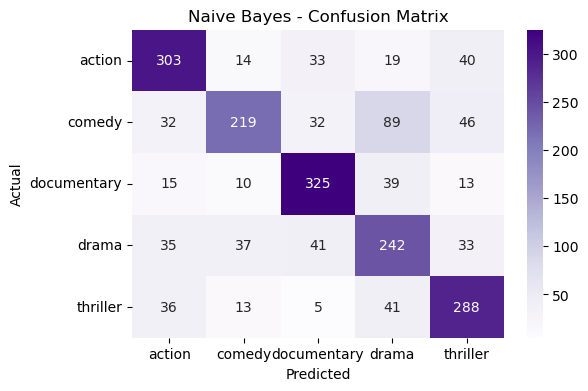

In [ ]:
print("🟣 Naive Bayes")

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes - Confusion Matrix", "Purples", label_encoder.classes_)

🟢 Random Forest
              precision    recall  f1-score   support

      action       0.65      0.69      0.67       409
      comedy       0.64      0.46      0.54       418
 documentary       0.72      0.78      0.75       402
       drama       0.47      0.54      0.51       388
    thriller       0.67      0.66      0.67       383

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000

🎯 Weighted F1 Score: 0.6254


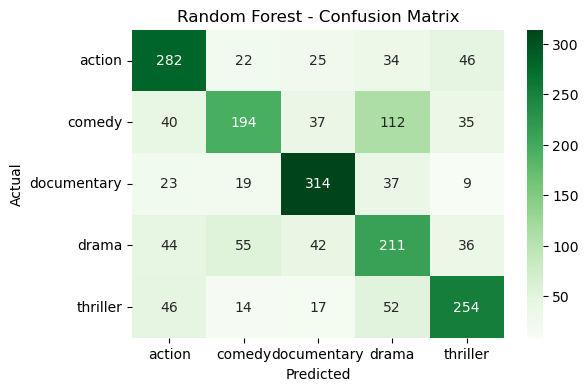

In [ ]:
print("🟢 Random Forest")

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print(f"🎯 Weighted F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix", "Greens", label_encoder.classes_)

# AFTER TRAINING TFIDF

In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_X_vectorized, y_encoded, test_size=0.3, random_state=42)


selector = SelectKBest(chi2, k=3900)
X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
X_test_sel = selector.transform(X_test_tfidf)

def plot_confusion_matrix(y_true, y_pred, title, cmap, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'solver': ['liblinear', 'lbfgs'],   # Optimization solver
    'penalty': ['l2']                   # Regularization type (lbfgs only supports 'l2')
}

# Create the model
lr = LogisticRegression(max_iter=1000)

# Grid search using weighted F1 score and 5-fold CV
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, 
                       scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Fit the model using selected features (after SelectKBest)
grid_lr.fit(X_train_sel, y_train)

# Best model and predictions
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_sel)

# Results
print("🔵 Best Logistic Regression Parameters:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print(f"🎯 Best Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔵 Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

      action       0.75      0.72      0.74       316
      comedy       0.67      0.66      0.66       309
 documentary       0.74      0.83      0.79       284
       drama       0.61      0.60      0.60       301
    thriller       0.75      0.72      0.73       290

    accuracy                           0.70      1500
   macro avg       0.70      0.71      0.70      1500
weighted avg       0.70      0.70      0.70      1500

🎯 Best Weighted F1 Score: 0.7038
